In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import seaborn as sns

In [2]:
asian_bank= pd.read_excel("default of credit card clients.xls",header=1)

In [3]:
asian_bank=asian_bank.drop(['ID'],axis=1)

# Analyse descriptive :

In [4]:
#les info generale 
asian_bank.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

In [5]:
# nbre de ligne et col
asian_bank.shape

(30000, 24)

In [6]:
# type et valeur manquante 
asian_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

- les valeurs de chaque colone : 

In [7]:
asian_bank["SEX"].unique()

array([2, 1], dtype=int64)

In [8]:
asian_bank["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [21]:
asian_bank["PAY_0"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [22]:
asian_bank["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [23]:
asian_bank["default payment next month"].unique()

array([1, 0], dtype=int64)

In [24]:
asian_bank["PAY_2"].unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8], dtype=int64)

- on remarque l'existance des valeurs qui  n'ont pas été mentionnés dans le dictionnaire 

In [9]:
# Categorical variables description
asian_bank[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

SEX     EDUCATION      MARRIAGE
count  30000.000000  30000.000000  30000.000000
mean       1.603733      1.853133      1.551867
std        0.489129      0.790349      0.521970
min        1.000000      0.000000      0.000000
25%        1.000000      1.000000      1.000000
50%        2.000000      2.000000      2.000000
75%        2.000000      2.000000      2.000000
max        2.000000      6.000000      3.000000

In [10]:
# Payment delay description
asian_bank[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  30000.000000  
mean      -0.291100  
std        1.149988  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

In [11]:
# Bill Statement description
asian_bank[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   30000.000000   30000.000000  
mean    40311.400967   38871.760400  
std     60797.155770   59554.107537  
min    -81334.000000 -339603.000000  
25%      1763.000000    1256.000000  
50%     18104.500000   17071.000000  
75%     50190.500000   49198.250000  
max    927171.000000  961664.000000

In [12]:
#Previous Payment Description
asian_bank[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000

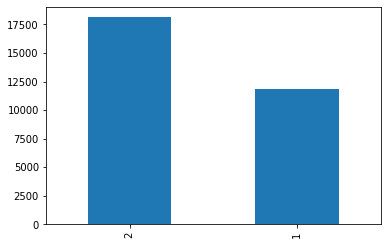

In [30]:
asian_bank.SEX.value_counts().plot(kind="bar");

- La majorité des clients sont des femmes 

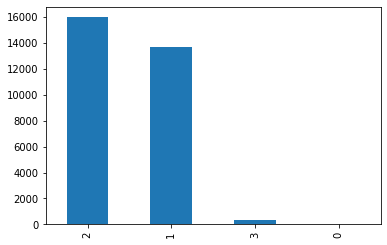

In [31]:
asian_bank.MARRIAGE.value_counts().plot(kind="bar")

- La majorité des cleints sont marriés ( et autres )

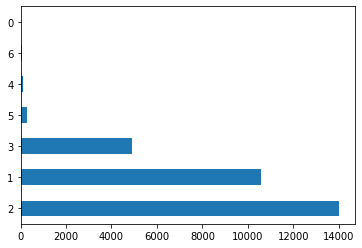

In [32]:
asian_bank.EDUCATION.value_counts().plot(kind="barh");

- most Education university then graduated school


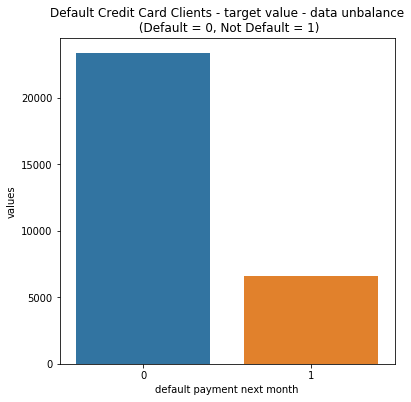

In [13]:
temp = asian_bank["default payment next month"].value_counts()
df = pd.DataFrame({'default payment next month': temp.index , 'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default payment next month', y ="values", data=df)
locs, labels = plt.xticks()
plt.show()

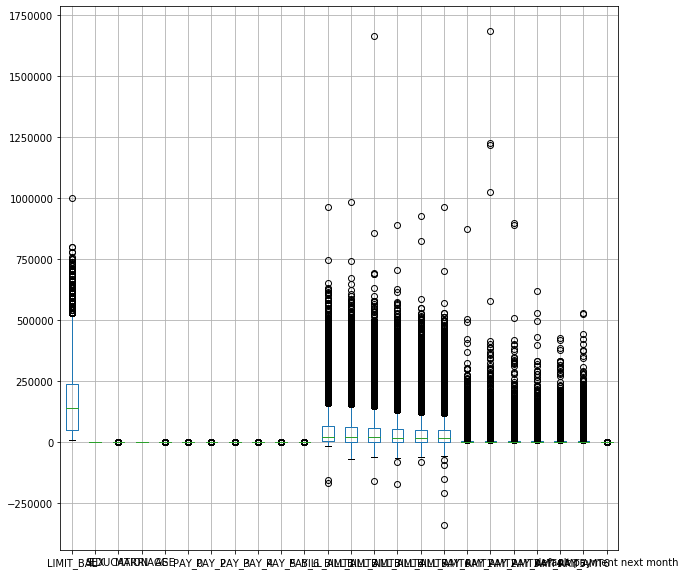

In [36]:
asian_bank.boxplot(figsize=(10,10));

- On remarque l'existance des points abérrants

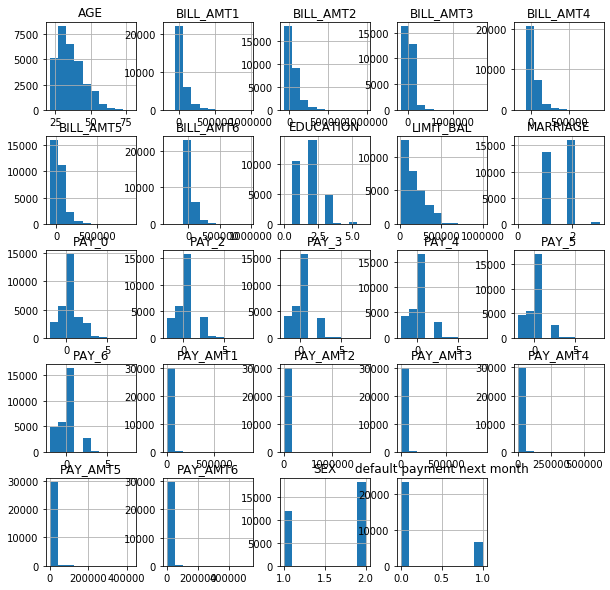

In [38]:
asian_bank.hist(figsize=(10,10));

In [42]:
asian_bank.corr()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.021602   
BILL_AMT3                    0.283236 -0.024563   0.013002 -0.024909   
BILL_AMT4                    0.293988 -0.021880  -0.000451 -0.023344   
BILL_AMT5                    0.295562 -0.017005  -0.007567 -0.025393   
BILL_AMT6                    0.290389 -0.016733  -0.009099 -0.021207   
PAY_AMT1                     0.195236 -0.000242  -0.037456 -0.005979   
PAY_AMT2                     0.178408 -0.001391  -0.030038 -0.008093   
PAY_AMT3                     0.210167 -0.008597  -0.039943 -0.003541   
PAY_AMT4                     0.203242 -0.002229  -0.038218 -0.012659   
PAY_AMT5                     0.217202 -0.001667  -0.040358 -0.001205   
PAY_AMT6                     0.219595 -0.002766  -0.037200 -0.006641   
default payment next month  -0.153520 -0.039961   0.028006 -0.024339   

                                 AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
LIMIT_BAL                   0.144713 -0.271214 -0.296382 -0.286123 -0.267460   
SEX                        -0.090874 -0.057643 -0.070771 -0.066096 -0.060173   
EDUCATION                   0.175061  0.105364  0.121566  0.114025  0.108793   
MARRIAGE                   -0.414170  0.019917  0.024199  0.032688  0.033122   
AGE                         1.000000 -0.039447 -0.050148 -0.053048 -0.049722   
PAY_0                      -0.039447  1.000000  0.672164  0.574245  0.538841   
PAY_2                      -0.050148  0.672164  1.000000  0.766552  0.662067   
PAY_3                      -0.053048  0.574245  0.766552  1.000000  0.777359   
PAY_4                      -0.049722  0.538841  0.662067  0.777359  1.000000   
PAY_5                      -0.053826  0.509426  0.622780  0.686775  0.819835   
PAY_6                      -0.048773  0.474553  0.575501  0.632684  0.716449   
BILL_AMT1                   0.056239  0.187068  0.234887  0.208473  0.202812   
BILL_AMT2                   0.054283  0.189859  0.235257  0.237295  0.225816   
BILL_AMT3                   0.053710  0.179785  0.224146  0.227494  0.244983   
BILL_AMT4                   0.051353  0.179125  0.222237  0.227202  0.245917   
BILL_AMT5                   0.049345  0.180635  0.221348  0.225145  0.242902   
BILL_AMT6                   0.047613  0.176980  0.219403  0.222327  0.239154   
PAY_AMT1                    0.026147 -0.079269 -0.080701  0.001295 -0.009362   
PAY_AMT2                    0.021785 -0.070101 -0.058990 -0.066793 -0.001944   
PAY_AMT3                    0.029247 -0.070561 -0.055901 -0.053311 -0.069235   
PAY_AMT4                    0.021379 -0.064005 -0.046858 -0.046067 -0.043461   
PAY_AMT5                    0.022850 -0.058190 -0.037093 -0.035863 -0.033590   
PAY_AMT6                    0.019478 -0.058673 -0.036500 -0.035861 -0.026565   
default payment next month  0.013890  0.324794  0.263551  0.235253  0.216614   

                               PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
LIMIT_BAL                  -0.249411  ...   0.293988   0.295562   0.290389   
SEX                        -0.055064  ...  -0.021880  -0.017005  -0.01

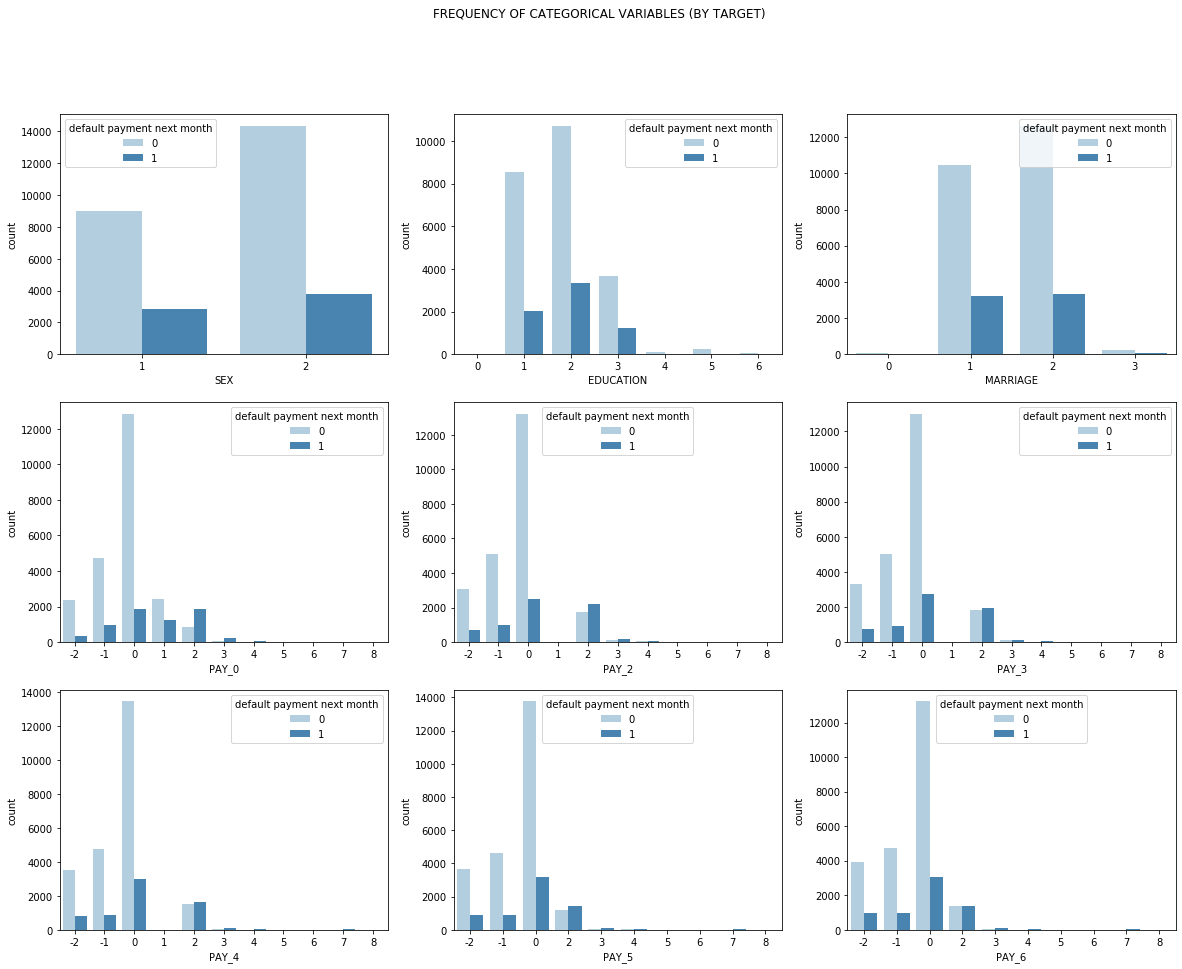

In [41]:
# Creating a new dataframe with categorical variables
subset = asian_bank[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default payment next month']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="default payment next month", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default payment next month", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default payment next month", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default payment next month", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default payment next month", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default payment next month", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default payment next month", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default payment next month", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default payment next month", data=subset, palette="Blues", ax=axes[2,2]);

- Il y a 30 000 clients de cartes de crédit.

- La valeur moyenne du montant de la limite de carte de crédit est de 167 484 dollars NT. L'écart type est de 129 747 dollars NT, allant de 10 000 à 1 million de dollars NT.

- Le niveau d'éducation est principalement des études supérieures et universitaires.

- La plupart des clients sont soit marronnés soit célibataires (moins fréquent l'autre statut).

- L'âge moyen est de 35,5 ans, avec un écart type de 9,2.

- Comme la valeur 0 pour le paiement par défaut signifie «pas par défaut» et la valeur 1 signifie «par défaut», la moyenne de 0,221 signifie que 22,1% des contrats de carte de crédit seront en défaut le mois prochain.